<a href="https://colab.research.google.com/github/yumioh/data_analysis/blob/main/Tesla_Project/tesla_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!git clone https://github.com/yumioh/data_analysis.git

Cloning into 'data_analysis'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 472 (delta 22), reused 49 (delta 15), pack-reused 413
Receiving objects: 100% (472/472), 61.03 MiB | 26.92 MiB/s, done.
Resolving deltas: 100% (246/246), done.


#데이터 전처리 작업순서


## 데이터 정제 (Data Cleaning)
- 잡음, 부적합, 결측치를 수정하고 읽을 수 없는 요소 제거
- 형식의 일관성을 유지하고 적합한 포맷으로 변환


1. 잡음
   - 구간화 : 정렬된 데이터를 구간으로 분할
   - 회귀 : 회귀 분석을 통해 평활화
   - 군집화 : 유사한 값들을 그룹화


### 수집한 데이터인 cvs 파일 불려오기

In [ ]:
import json
import pandas as pd
import numpy as np

#데이터 수집한 파일 들고 오기
filename = f'teslaNews_2301.csv'
filepath = f'/content/drive/MyDrive/핀테크 추천시스템/테슬라 프로젝트/tesla_data/{filename}'

df = pd.read_csv(filepath)
df.shape

(4303, 5)

### 결측지 제거 : 비어 있는 행 제거

In [ ]:
df = df.dropna(axis=0)
df.shape
df.head(10)

Unnamed: 0                                         title        date media  \
0           0      [미리보는 이데일리 신문]갈등 씨앗서 통합 불씨로…정치권, 이젠 달라져야  2023.01.01  이데일리   
1           1          머스크, 1년 새 재산 252조원 증발…미 경제지 "역사상 최대"  2023.01.01  매일신문   
2           2          재산 2000억 달러 날려버린 최초의 인간…머스크가 신기록 세웠다  2023.01.01  데일리안   
3           3  인류 최초 ‘2000억 달러 날린 사람’ 등극…머스크, 테슬라 주가 폭락에 굴욕  2023.01.01  서울신문   
4           4                   252조6000억원…머스크가 1년 만에 날린 재산  2023.01.01  한국경제   
5           5                中 제조업, 3년만에 최악인데…시진핑 “서광이 눈앞에”  2023.01.01  매일경제   
6           6          작년 금융시장 30조弗 증발…OECD "연기금 유동성 위기" 경고  2023.01.01  서울경제   
7           7                美 IRA 완화…韓 배터리업계 '탈중국 공급망' 청신호  2023.01.01  한국경제   
8           8             "일론 머스크, 재산 2000억 달러 날린 역사상 첫 인물"  2023.01.01  부산일보   
9           9                     머스크, 재산 252조 날렸다…“역사상 최초”  2023.01.01  서울신문   

                                             content  
0  [이데일리 이다원 기자] 다음은 2일자 이데일리 신문 주요 뉴스다.△1면-갈등 씨앗...  
1  테슬라와 트위터 최고경영자(CEO)로 세계 2위 부자인 일론 머스크가 인류 역사상 ...  
2  [데일리안 = 이지희 기자] 일론 머스크 테슬라 최고경영자(CEO)가 테슬라 주가 ...  
3  [서울신문 나우뉴스]일론 머스크 / 사진=트위터일론 머스크(51) 테슬라 최고경영자...  
4  한 해 자산 감소  2000억弗사상 첫 인물 블룸버그 보도일론 머스크 테슬라 최고경...  
5  12월 제조업 PMI 47로 하락시진핑 “감염병 새단계..조금만 힘내자” 중국 공산...  
6  MSCI지수 2008년 이후 최대폭 ↓메타·테슬라 주가 60% 떨어져채권 가격까지 ...  
7  美와 FTA 국가 아니더라도배터리 광물 조달 가능보조금 받는 길도 넓어져中 기업은 ...  
8  사진은 2022년 10월 28일 촬영된 트위터 로고와 일론 머스크의 모습. 연합뉴스...  
9  일론 머스크. 2022.12.31 AP연합뉴스미국 전기차 기업 테슬라와 SNS플랫폼...

### 목적에 맞는 정보 수집을 위해 불필요한 정보제거
- media(신문매체이름), Unnamed 열 제거
- 정규화를 통한 공백처리, 한글만 추출 등 부적합한 요소 제거
- 140자 이하 신문기사 내용 제외
- 1차 처리된 데이터 cvs파일로 저장


In [ ]:
df.drop(['media','Unnamed: 0'],axis=1,inplace = True)
df.shape
df.head(10)

title        date  \
0      [미리보는 이데일리 신문]갈등 씨앗서 통합 불씨로…정치권, 이젠 달라져야  2023.01.01   
1          머스크, 1년 새 재산 252조원 증발…미 경제지 "역사상 최대"  2023.01.01   
2          재산 2000억 달러 날려버린 최초의 인간…머스크가 신기록 세웠다  2023.01.01   
3  인류 최초 ‘2000억 달러 날린 사람’ 등극…머스크, 테슬라 주가 폭락에 굴욕  2023.01.01   
4                   252조6000억원…머스크가 1년 만에 날린 재산  2023.01.01   
5                中 제조업, 3년만에 최악인데…시진핑 “서광이 눈앞에”  2023.01.01   
6          작년 금융시장 30조弗 증발…OECD "연기금 유동성 위기" 경고  2023.01.01   
7                美 IRA 완화…韓 배터리업계 '탈중국 공급망' 청신호  2023.01.01   
8             "일론 머스크, 재산 2000억 달러 날린 역사상 첫 인물"  2023.01.01   
9                     머스크, 재산 252조 날렸다…“역사상 최초”  2023.01.01   

                                             content  
0  [이데일리 이다원 기자] 다음은 2일자 이데일리 신문 주요 뉴스다.△1면-갈등 씨앗...  
1  테슬라와 트위터 최고경영자(CEO)로 세계 2위 부자인 일론 머스크가 인류 역사상 ...  
2  [데일리안 = 이지희 기자] 일론 머스크 테슬라 최고경영자(CEO)가 테슬라 주가 ...  
3  [서울신문 나우뉴스]일론 머스크 / 사진=트위터일론 머스크(51) 테슬라 최고경영자...  
4  한 해 자산 감소  2000억弗사상 첫 인물 블룸버그 보도일론 머스크 테슬라 최고경...  
5  12월 제조업 PMI 47로 하락시진핑 “감염병 새단계..조금만 힘내자” 중국 공산...  
6  MSCI지수 2008년 이후 최대폭 ↓메타·테슬라 주가 60% 떨어져채권 가격까지 ...  
7  美와 FTA 국가 아니더라도배터리 광물 조달 가능보조금 받는 길도 넓어져中 기업은 ...  
8  사진은 2022년 10월 28일 촬영된 트위터 로고와 일론 머스크의 모습. 연합뉴스...  
9  일론 머스크. 2022.12.31 AP연합뉴스미국 전기차 기업 테슬라와 SNS플랫폼...

In [ ]:
import re, unicodedata
from string import whitespace

pattern_whitespace = re.compile(f'[{whitespace}]+')
# NaN 값을 빈 문자열로 대체
df['content_data'] = df['content'].fillna('').astype(str)

# 공백 처리 및 정규화
pattern_whitespace = re.compile(f'[{whitespace}]+')

df['content_data'] = df['content_data'].str.replace(
    pattern_whitespace, ' '
).map(lambda x: unicodedata.normalize('NFC', x)).str.strip()

In [ ]:
def clean_byline(text):
    # byline
    pattern_email = re.compile(r'[-_0-9a-z]+@[-_0-9a-z]+(?:\.[0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_url = re.compile(r'(?:https?:\/\/)?[-_0-9a-z]+(?:\.[-_0-9a-z]+)+', flags=re.IGNORECASE)
    pattern_others = re.compile(r'\.([^\.]*(?:기자|특파원|지난해|교수|서울|사진|작가|뉴스|대표|논설|고문|주필|부문장|팀장|장관|원장|연구원|이사장|위원|실장|차장|부장|에세이|화백|사설|소장|단장|과장|기획자|큐레이터|저작권|평론가|©|©|ⓒ|\@|\/|=|:앞쪽_화살표:|무단|전재|재배포|금지|\[|\]|\(\))[^\.]*)$')
    pattern_onlyKorean = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글과 띄어쓰기만 추출
    result = pattern_email.sub('', text)
    result = pattern_url.sub('', result)
    result = pattern_others.sub('.', result)
    result = pattern_onlyKorean.sub('',result)
    # 본문 시작 전 꺽쇠로 쌓인 바이라인 제거
    pattern_bracket = re.compile(r'^((?:\[.+\])|(?:【.+】)|(?:<.+>)|(?:◆.+◆)\s)')
    result = pattern_bracket.sub('', result).strip()
    return result
df['content_data'] = df['content_data'].map(clean_byline)

df.head(20)

title        date  \
0       [미리보는 이데일리 신문]갈등 씨앗서 통합 불씨로…정치권, 이젠 달라져야  2023.01.01   
1           머스크, 1년 새 재산 252조원 증발…미 경제지 "역사상 최대"  2023.01.01   
2           재산 2000억 달러 날려버린 최초의 인간…머스크가 신기록 세웠다  2023.01.01   
3   인류 최초 ‘2000억 달러 날린 사람’ 등극…머스크, 테슬라 주가 폭락에 굴욕  2023.01.01   
4                    252조6000억원…머스크가 1년 만에 날린 재산  2023.01.01   
5                 中 제조업, 3년만에 최악인데…시진핑 “서광이 눈앞에”  2023.01.01   
6           작년 금융시장 30조弗 증발…OECD "연기금 유동성 위기" 경고  2023.01.01   
7                 美 IRA 완화…韓 배터리업계 '탈중국 공급망' 청신호  2023.01.01   
8              "일론 머스크, 재산 2000억 달러 날린 역사상 첫 인물"  2023.01.01   
9                      머스크, 재산 252조 날렸다…“역사상 최초”  2023.01.01   
10              中 제조업, 우한 사태 후 최악 … 시진핑은 "서광 눈앞"  2023.01.01   
11                      작년 다우 8% 떨어질때 나스닥 33% 폭락  2023.01.01   
12                    “머스크, 250조원 날린 역사상 최초의 인간”  2023.01.01   
13         '억만장자' 머스크 불명예…"재산 2000억달러 날린 최초의 인물"  2023.01.01   
14             머스크 트위터 인수 도왔던 피델리티, 투자액 절반 이상 줄여  2023.01.01   
15         머스크, 재산 2,000억 달러 날린 역사상 최초의 사람…'불명예'  2023.01.01   
16                     [신년기획] 배터리 '이것' 없으면 못 만든다  2023.01.01   
17           韓‧美 동시 호재... 오일머니까지 캐는 현대차, 주가 반등할까  2023.01.01   
18           테슬라 주가, 지난해 65% 폭락…머스크 재산도 253조원 증발  2023.01.01   
19        ‘억만장자’ 머스크의 굴욕… “재산 2000억달러 날린 최초의 사람”  2023.01.01   

                                              content  \
0   [이데일리 이다원 기자] 다음은 2일자 이데일리 신문 주요 뉴스다.△1면-갈등 씨앗...   
1   테슬라와 트위터 최고경영자(CEO)로 세계 2위 부자인 일론 머스크가 인류 역사상 ...   
2   [데일리안 = 이지희 기자] 일론 머스크 테슬라 최고경영자(CEO)가 테슬라 주가 ...   
3   [서울신문 나우뉴스]일론 머스크 / 사진=트위터일론 머스크(51) 테슬라 최고경영자...   
4   한 해 자산 감소  2000억弗사상 첫 인물 블룸버그 보도일론 머스크 테슬라 최고경...   
5   12월 제조업 PMI 47로 하락시진핑 “감염병 새단계..조금만 힘내자” 중국 공산...   
6   MSCI지수 2008년 이후 최대폭 ↓메타·테슬라 주가 60% 떨어져채권 가격까지 ...   
7   美와 FTA 국가 아니더라도배터리 광물 조달 가능보조금 받는 길도 넓어져中 기업은 ...   
8   사진은 2022년 10월 28일 촬영된 트위터 로고와 일론 머스크의 모습. 연합뉴스...   
9   일론 머스크. 2022.12.31 AP연합뉴스미국 전기차 기업 테슬라와 SNS플랫폼...   
10  12월 제조업 PMI 47로급격한 위드코로나 쇼크중국의 제조업 경기가 2020년 2...   
11  머스크 재산 2000억弗 날려2022년 미국 뉴욕 증시가 2008년 세계 금융위기 ...   
12  500대 부자 중 지난해 재산감소 1위트위터 인수 뒤 테슬라 경영소홀 논란일론 머스...   
13  테슬라 최고경영자(CEO) 일론 머스크가 테슬라 주가 폭락으로 순자산 2000억 달...   
14  트위터 인수 2달여 만에 투자액 56% 줄여대규모 정리해고·영구정지 계정 복구 등머...   
15  테슬라 주가 65% 폭락한 영향일론 머스크 / 사진=연합뉴스일론 머스크 테슬라 최고...   
16  우리나라 이차전지는 해외 광물에 의존하고 있다. 대한상공회의소에 따르면 한국은 이차...   
17  지난해 12월 울산 북구 현대자동차 울산공장에서 임시 번호판을 부착한 완성차가 빠져...   
18  테슬라 주가 폭락에 재산 2000억달러 날려…역사상 최초올해 주가 반등 전망 엇갈려...   
19  테슬라 최고경영자(CEO) 일론 머스크/AP연합뉴스테슬라 최고경영자(CEO) 일론 ...   

                                         content_data  
0                   이데일리 이다원 기자 다음은 일자 이데일리 신문 주요 뉴스다  
1   테슬라와 트위터 최고경영자로 세계 위 부자인 일론 머스크가 인류 역사상 처음으로 년...  
2   데일리안  이지희 기자 일론 머스크 테슬라 최고경영자가 테슬라 주가 폭락으로 순자산...  
3   서울신문 나우뉴스일론 머스크  사진트위터일론 머스크 테슬라 최고경영자가 테슬라 주가...  
4   한 해 자산 감소 억사상 첫 인물 블룸버그 보도일론 머스크 테슬라 최고경영자사진가 ...  
5   월 제조업  로 하락시진핑 감염병 새단계조금만 힘내자 중국 공산당 제차 당 대회서 ...  
6   지수 년 이후 최대폭 메타테슬라 주가  떨어져채권 가격까지 유례없이 급락연준 올 금...  
7   와  국가 아니더라도배터리 광물 조달 가능보조금 받는 길도 넓어져 기업은 한국 진출...  
8   사진은 년 월 일 촬영된 트위터 로고와 일론 머스크의 모습 연합뉴스테슬라 최고경영자...  
9   일론 머스크  연합뉴스미국 전기차 기업 테슬라와 플랫폼 트위터 최고경영자인 일론 머...  
10  월 제조업  로급격한 위드코로나 쇼크중국의 제조업 경기가 년 월 우한 사태 이후 약...  
11  머스크 재산 억 날려년 미국 뉴욕 증시가 년 세계 금융위기 이후 최악의 성적을 냈다...  
12  대 부자 중 지난해 재산감소 위트위터 인수 뒤 테슬라 경영소홀 논란일론 머스크 테슬...  
13  테슬라 최고경영자 일론 머스크가 테슬라 주가 폭락으로 순자산 억 달러 감소를 기록한...  
14  트위터 인수 달여 만에 투자액  줄여대규모 정리해고영구정지 계정 복구 등머스크식 경...  
15  테슬라 주가  폭락한 영향일론 머스크  사진연합뉴스일론 머스크 테슬라 최고경영자가 ...  
16  우리나라 이차전지는 해외 광물에 의존하고 있다 대한상공회의소에 따르면 한국은 이차전...  
17  지난해 월 울산 북구 현대자동차 울산공장에서 임시 번호판을 부착한 완성차가 빠져나오...  
18  테슬라 주가 폭락에 재산 억달러 날려역사상 최초올해 주가 반등 전망 엇갈려저가매수 ...  
19  테슬라 최고경영자 일론 머스크연합뉴스테슬라 최고경영자 일론 머스크가 재산 억 달러약...

In [ ]:
#conten 기사 길이가 140자 이하인 경우 제외
df = df.loc[df['content_data'].str.len() > 140]
df.shape

(4212, 4)

In [ ]:
#cvs로 파일 저장
df.to_csv('/content/drive/MyDrive/핀테크 추천시스템/테슬라 프로젝트/tesla_data/telsa_preprosessing.csv',encoding='utf-8-sig')

### Counter 모듈을 이용한 가장 많이 나오는 단어 추출

In [ ]:
from collections import Counter
#가장 많이 나오는 단어 추출
words_list = df['content_data'].str.split()
all_word = [word for words in words_list for word in words]
word_count = Counter(all_word)
most_commos_words = word_count.most_common(10)
most_commos_words


[('테슬라', 7556),
 ('수', 7110),
 ('년', 6843),
 ('전기차', 6819),
 ('지난해', 6792),
 ('등', 6221),
 ('있다', 5960),
 ('월', 5893),
 ('것으로', 5838),
 ('미국', 5583)]

### 분석할 기사 공백으로 토큰화

In [ ]:
from gensim import corpora
from gensim.models import LdaModel, TfidfModel

docs = df['content_data']

#분석할 문서를 공백으로 토큰화
tokenized_docs = []
for doc in docs:
  tokenized_docs.append(doc.split(' '))

In [ ]:
id2word = corpora.Dictionary(tokenized_docs)
print(id2word)

Dictionary<172726 unique tokens: ['', '가동', '가치도', '가치를', '감소를']...>


In [ ]:
for value in id2word:
  print(value, id2word[value])

In [ ]:
corpus_TDM = []
for doc in tokenized_docs:
  #print(doc)
  result = id2word.doc2bow(doc)
  corpus_TDM.append(result)

corpus_TDM

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 5),
  (21, 1),
  (22, 2),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 3),
  (34, 4),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 4),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 4),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 1)

In [ ]:
tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 5 #토픽의 개수
lda = LdaModel(corpus=corpus_TFIDF,
               id2word=id2word,
               num_topics=n,
               random_state=100)

for t in lda.print_topics():
  print(t[0],":",t[1])


0 : 0.000*"포인트" + 0.000*"억원" + 0.000*"원" + 0.000*"지수는" + 0.000*"전장보다" + 0.000*"억원을" + 0.000*"개인은" + 0.000*"기관은" + 0.000*"억" + 0.000*"마감했다"
1 : 0.000*"물을" + 0.000*"머스탱" + 0.000*"불이" + 0.000*"가격" + 0.000*"메트로" + 0.000*"뿌려" + 0.000*"화재가" + 0.000*"모델와" + 0.000*"모델" + 0.000*"인하는"
2 : 0.001*"가격" + 0.001*"머스탱" + 0.001*"전기차" + 0.001*"해안" + 0.001*"마하" + 0.001*"가격을" + 0.001*"포드" + 0.001*"포드는" + 0.001*"배터리" + 0.000*"절벽에서"
3 : 0.000*"트럼프" + 0.000*"대통령의" + 0.000*"재산" + 0.000*"계정을" + 0.000*"대선" + 0.000*"억" + 0.000*"계정" + 0.000*"도널드" + 0.000*"머스크가" + 0.000*"전기차"
4 : 0.000*"우리사주" + 0.000*"에너지솔루션은" + 0.000*"원통형" + 0.000*"배터리" + 0.000*"보호예수" + 0.000*"에너지솔루션의" + 0.000*"전기차" + 0.000*"중국" + 0.000*"오버행" + 0.000*"연구원은"


## 데이터 통합
- 다양한 소스에서 얻은 데이터를 단일 형식으로 변경
- 이름 의미의 일관성을 유지하고 메타 데이터 또한 유지함

##데이터 축소
- 일반적인 데이터는 크기가 너무 커서 한번에 분석이 어려워 축소하여 사용하는 것이 효과적
- 샘플링, 차원축소, 특징 선택, 이산화[링크 텍스트](https://)

## 데이터 변환
- 정규화, 집계 등을 통해 데이터 형식이나 구조를 변환

# 라쏘회귀 (LASSO)
 - 선형 회귀는 비용함수인 mse를 최소하하는 방향으로 머신러닝 모델이 학습을 진행함
 - 열의 개수가 많아질수록 과적합 될 가능성이 높아져 어느정도 규제를 줌으로써 과적합 되는 것을 방지하는 Ridge와 Lasso 사용
 - 시그마 앞 알파값을 통해 규제 정도를 얼마나 줄기 조절
 - alpha값 크면 규제 강도가 세지므로 계수값을 더 줄이고 더 과소적합 되도록 유도
 - alpha값 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합 될 가능성이 큼
 - 적절한 alpha값을 찾는 법:
  alpha값에 대한 r^2값의 그래프를 그려봄
  훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 됨
 - 변수를 0으로 만듬 -> 필요없는 변수를 제외시킴

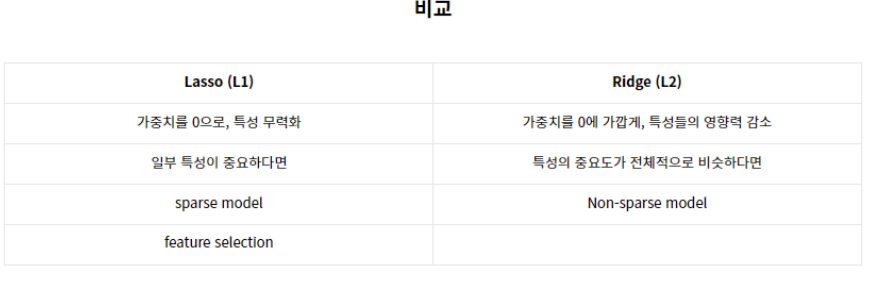